<a href="https://colab.research.google.com/github/abhyudaya29/opencv_fave_detector/blob/main/CNN%20in%20tensorflow%20to%20detect%20faces%20in%20an%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
32/32 [==============================] - 4s 52ms/step - loss: 0.9508 - accuracy: 0.4990
Epoch 2/10
32/32 [==============================] - 2s 52ms/step - loss: 0.6933 - accuracy: 0.4910
Epoch 3/10
32/32 [==============================] - 2s 55ms/step - loss: 0.6932 - accuracy: 0.4770
Epoch 4/10
32/32 [==============================] - 2s 49ms/step - loss: 0.6932 - accuracy: 0.5030
Epoch 5/10
32/32 [==============================] - 2s 48ms/step - loss: 0.6932 - accuracy: 0.4810
Epoch 6/10
32/32 [==============================] - 2s 56ms/step - loss: 0.6932 - accuracy: 0.5030
Epoch 7/10
32/32 [==============================] - 2s 49ms/step - loss: 0.6932 - accuracy: 0.5030
Epoch 8/10
32/32 [==============================] - 2s 54ms/step - loss: 0.6931 - accuracy: 0.5030
Epoch 9/10
32/32 [==============================] - 2s 55ms/step - loss: 0.6931 - accuracy: 0.5030
Epoch 10/10
1/1 [==============================] - 0s 133ms/step


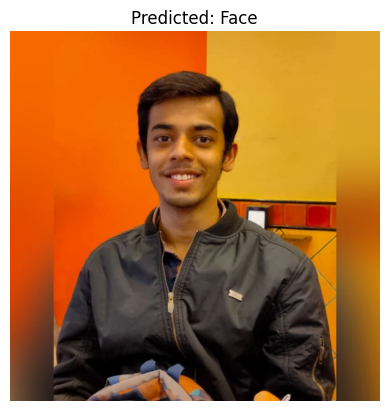

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

##Switching runtime from cpu to GPU

# Defining  the CNN model
model = tf.keras.Sequential([
    # Convolutional layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flattening the output for the fully connected layers
    tf.keras.layers.Flatten(),

    # Fully connected layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model

num_samples = 1000
image_height = 224
image_width = 224
num_channels = 3
X_train = np.random.random((num_samples, image_height, image_width, num_channels))
y_train = np.random.randint(2, size=num_samples)

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Loading an image for testing
test_image_path = '/content/WhatsApp Image 2022-08-24 at 11.48.36 AM.jpeg'
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # OpenCV reads in BGR format


resized_test_image = cv2.resize(test_image, (image_width, image_height))
input_image = np.expand_dims(resized_test_image, axis=0)

predictions = model.predict(input_image)
prediction_label = 'Face' if predictions[0][0] > 0.6 else 'Non-Face'


plt.imshow(test_image)
plt.title(f'Predicted: {prediction_label}')
plt.axis('off')
plt.show()


In [28]:
### Tsting for non-face image
model = tf.keras.Sequential([
    # Convolutional layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Convolutional layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the output for the fully connected layers
    tf.keras.layers.Flatten(),

    # Fully connected layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [30]:
num_samples = 1000
image_height = 224
image_width = 224
num_channels = 3
X_train = np.random.random((num_samples, image_height, image_width, num_channels))
y_train = np.random.randint(2, size=num_samples)

In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 4s 55ms/step - loss: 1.0319 - accuracy: 0.5090
Epoch 2/10
32/32 [==============================] - 2s 52ms/step - loss: 0.6941 - accuracy: 0.4980
Epoch 3/10
32/32 [==============================] - 2s 48ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 4/10
32/32 [==============================] - 2s 48ms/step - loss: 0.6931 - accuracy: 0.5080
Epoch 5/10
32/32 [==============================] - 2s 48ms/step - loss: 0.6931 - accuracy: 0.5080
Epoch 6/10
32/32 [==============================] - 2s 48ms/step - loss: 0.6931 - accuracy: 0.5080
Epoch 7/10
32/32 [==============================] - 2s 48ms/step - loss: 0.6931 - accuracy: 0.5080
Epoch 8/10
32/32 [==============================] - 2s 49ms/step - loss: 0.6932 - accuracy: 0.5080
Epoch 9/10
32/32 [==============================] - 2s 54ms/step - loss: 0.6931 - accuracy: 0.5080
Epoch 10/10
32/32 [==============================] - 2s 51ms/step - loss: 0.6931 - accuracy: 0.5080


In [32]:

test_image_path = '/content/3afe77884f37d52fc044deaf48798299.jpg'
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [33]:

resized_test_image = cv2.resize(test_image, (image_width, image_height))
input_image = np.expand_dims(resized_test_image, axis=0)

In [34]:

predictions = model.predict(input_image)
prediction_label = 'Face' if predictions[0][0] > 0.6 else 'Non-Face'

1/1 [==============================] - 0s 75ms/step


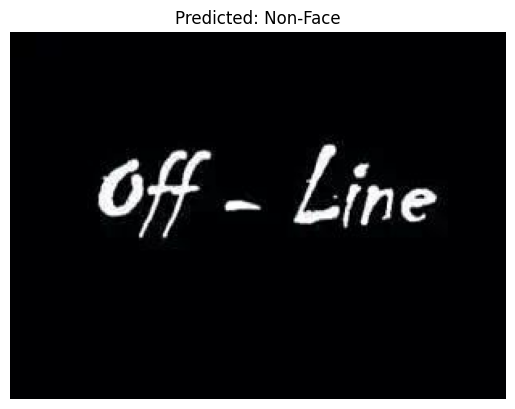

In [35]:

plt.imshow(test_image)
plt.title(f'Predicted: {prediction_label}')
plt.axis('off')
plt.show()